In [2]:
import matplotlib.pyplot as plt

def plot_action_cruve(file_name):
    file=open(file_name,"r")
    actions=[]
    for line in file.readlines():
        action=line.split(",")
        for a in action:
            actions.append(a)
    lst=[]
    for a in actions:
        b=a.strip('[').strip(']').split(" ")
        lst.append(b)
    
    action_values=[]
    for l in lst:
        for s in l:
            if (s!='0.' and s!=""):
                    if s!=']':
                        s=s.rstrip("]")
                        action_values.append(float(s))                  
    
    plt.plot(action_values)

In [3]:
def plot_rewards(file_name):
    f=open(file_name,"r")
    R=[]
    for l in f:
        for r in l.split(','):
            R.append(r)
    Rewards=[]
    for r in R:
        if r!='':
            Rewards.append(float(r))
    plt.plot(Rewards)

### 目前设定  

#### 奖励函数方案
```
done = False
        reward=-10
        
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
    
        if pose.position.z == self.target_z:
            self.target_hit+=1
            reward+=10*self.target_hit
       
        if pose.position.z > 20:
            done=True
        if timestamp > self.max_duration:
            done=True
```
* 噪点方差
theta=0.1; sigma=0.35

#### DDPG模型参数
* gamma=0.99
* memory 存取方案
   * buffer_size=1000
   * sample_size=50  
   
   
####  Actor和Critic
  * l2正则化，10(-5)
  * 优化器 Adam
  * 激活函数 relu

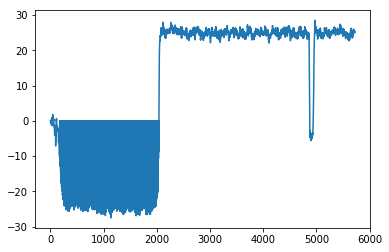

In [13]:
plot_action_cruve("actions_hover_01.txt")

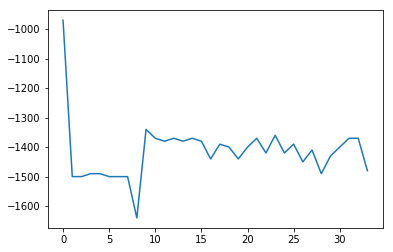

In [14]:
plot_rewards("rewards_hover_01.txt")

```
 done = False
        reward=-10
        
        if timestamp > self.takeoff_limit:
            if pose.position.z < self.target_z:
                done=True
    
        if pose.position.z == self.target_z:
            self.target_hit+=1
            reward+=10*(self.target_hit**2)+10
       
        if pose.position.z > 20:
            done=True
        if timestamp > self.max_duration:
            done=True
```

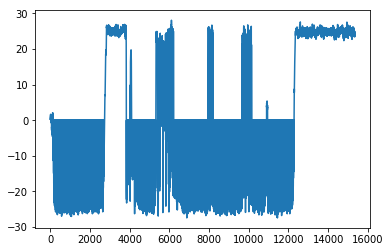

In [15]:
plot_action_cruve("actions_hover_02.txt")

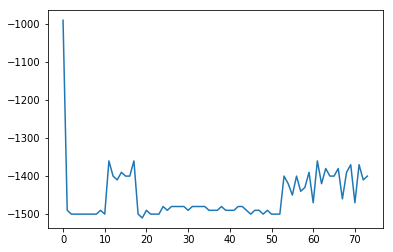

In [16]:
plot_rewards("rewards_hover_02.txt")

#### 改进memory存取机制
实现优先级存取，奖励大的讲演优先级更高，被保留在memory的机会和被取样学习的概率都更大
* 用deque存放经验，根据优先级排序，如果存满，优先级低的经验会先被“挤出去”，优先级高的经验留存的时间更长
* 取样时，用random的概率机制，优先级高的取样概率更大

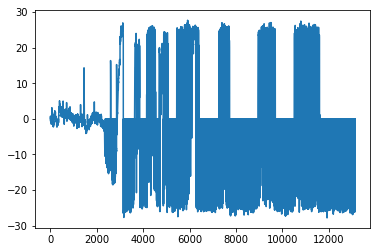

In [17]:
plot_action_cruve("actions_hover_03.txt")

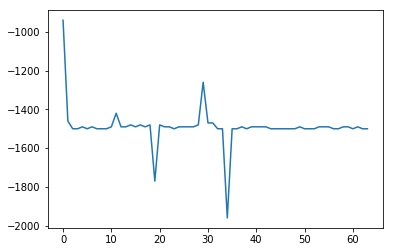

In [18]:
plot_rewards("rewards_hover_03.txt")

* 噪点方差微调
   * theta=0.1,sigma=0.3

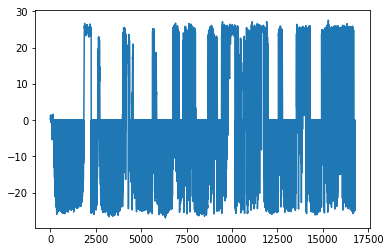

In [19]:
plot_action_cruve("actions_hover_04.txt")

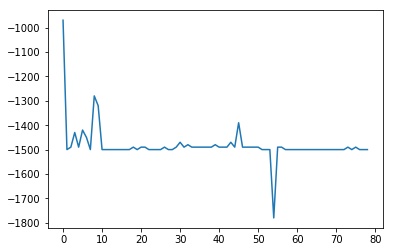

In [21]:
plot_rewards("rewards_hover_04.txt")

*  起飞上限时间延长为7s
*  Actor 和Critic 模型调整：去掉MLP的正则化惩罚

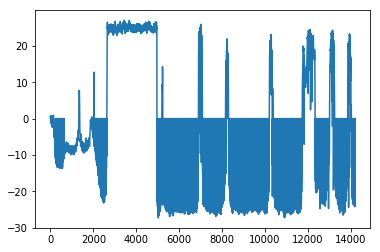

In [24]:
plot_action_cruve("actions_hover_06.txt")

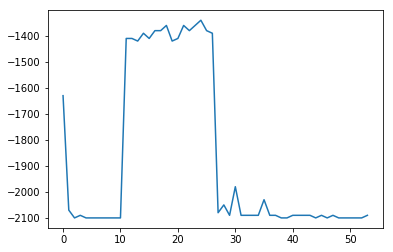

In [25]:
plot_rewards("rewards_hover_06.txt")

#### 下阶段调整方向
* memory 存取的参数，“好”经验的优先取样概率继续调大些，取样数量是否还要调整
* 奖励函数？
* 先调整 Actor模型，